[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mihretabn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mihretabn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mihretabn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Fake News Detection using TFIDF features
Vector size for tfidf: 434069
Training data shape: (800, 434069)
Testing data shape: (200, 434069)
Naive Bayes Results:
Accuracy: 0.9400
Precision: 0.9408
Recall: 0.9400
F1-score: 0.9400
AUC-ROC: 0.9724


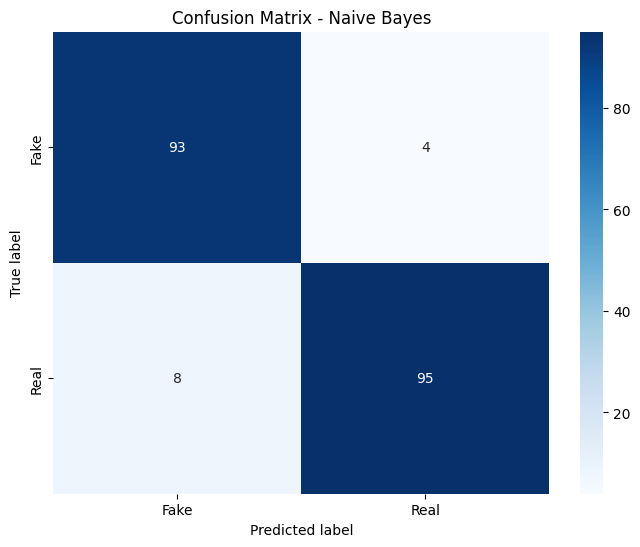

SVM Results:
Accuracy: 0.9350
Precision: 0.9353
Recall: 0.9350
F1-score: 0.9350
AUC-ROC: 0.9845


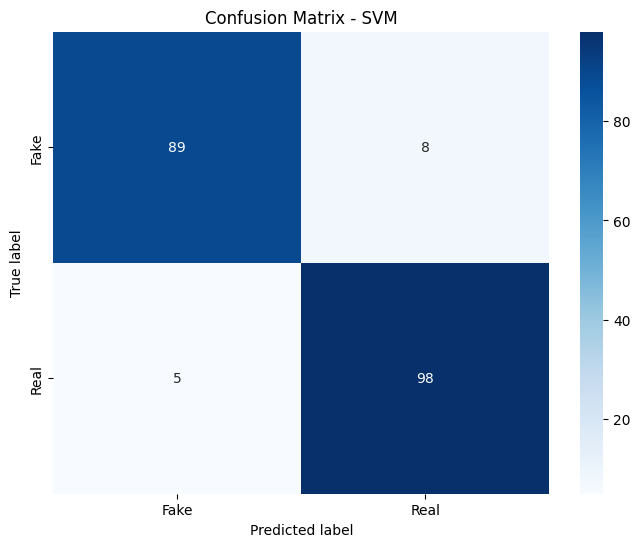

Random Forest Results:
Accuracy: 0.9650
Precision: 0.9650
Recall: 0.9650
F1-score: 0.9650
AUC-ROC: 0.9901


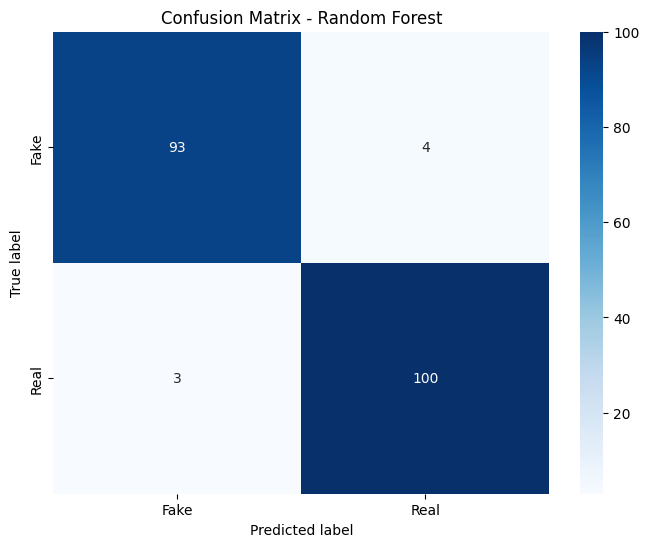

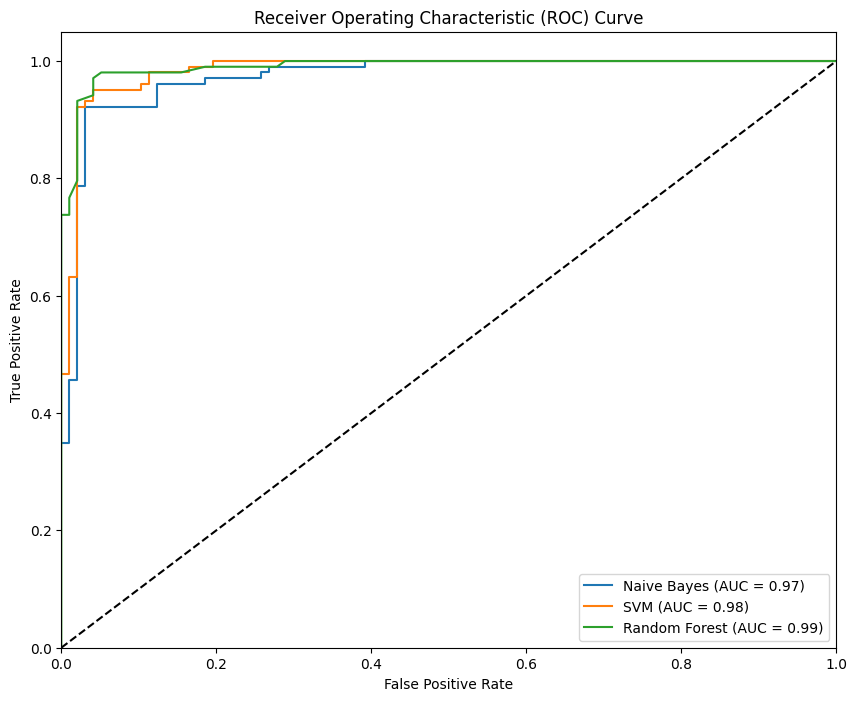

Best model for Fake News Detection using TFIDF (Random Forest) saved in Models folder.
Best accuracy: 0.9650

Fake News Detection using COUNT features
Vector size for count: 434069
Training data shape: (800, 434069)
Testing data shape: (200, 434069)
Naive Bayes Results:
Accuracy: 0.9350
Precision: 0.9351
Recall: 0.9350
F1-score: 0.9350
AUC-ROC: 0.9575


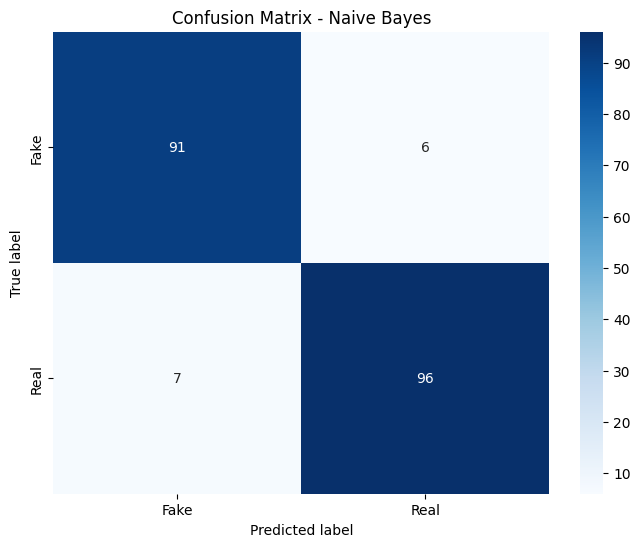

SVM Results:
Accuracy: 0.9400
Precision: 0.9406
Recall: 0.9400
F1-score: 0.9399
AUC-ROC: 0.9746


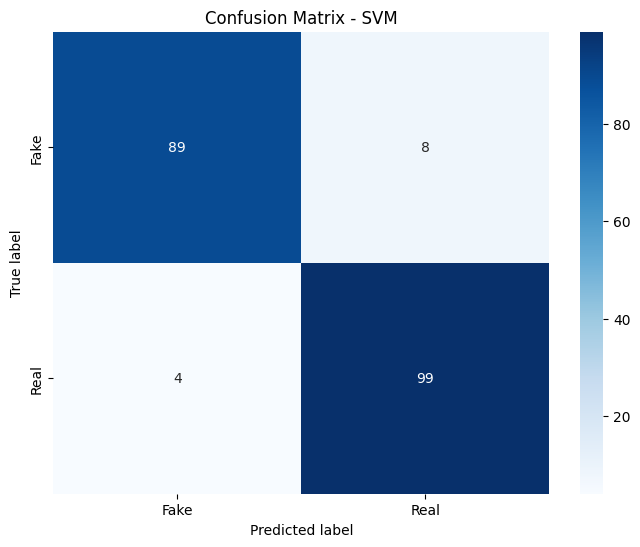

Random Forest Results:
Accuracy: 0.9500
Precision: 0.9508
Recall: 0.9500
F1-score: 0.9500
AUC-ROC: 0.9870


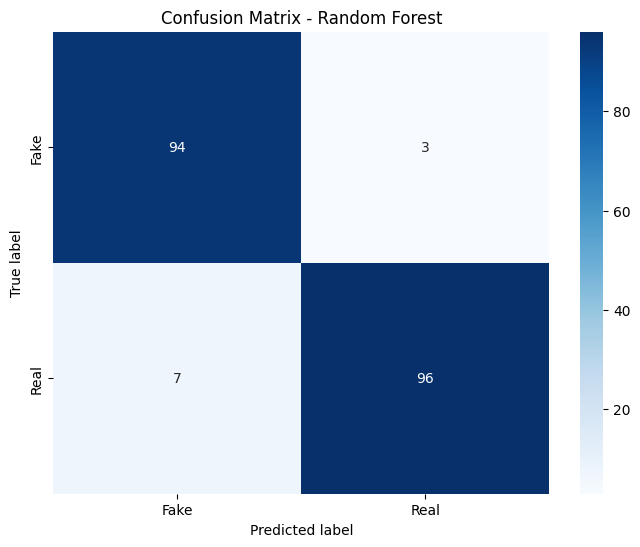

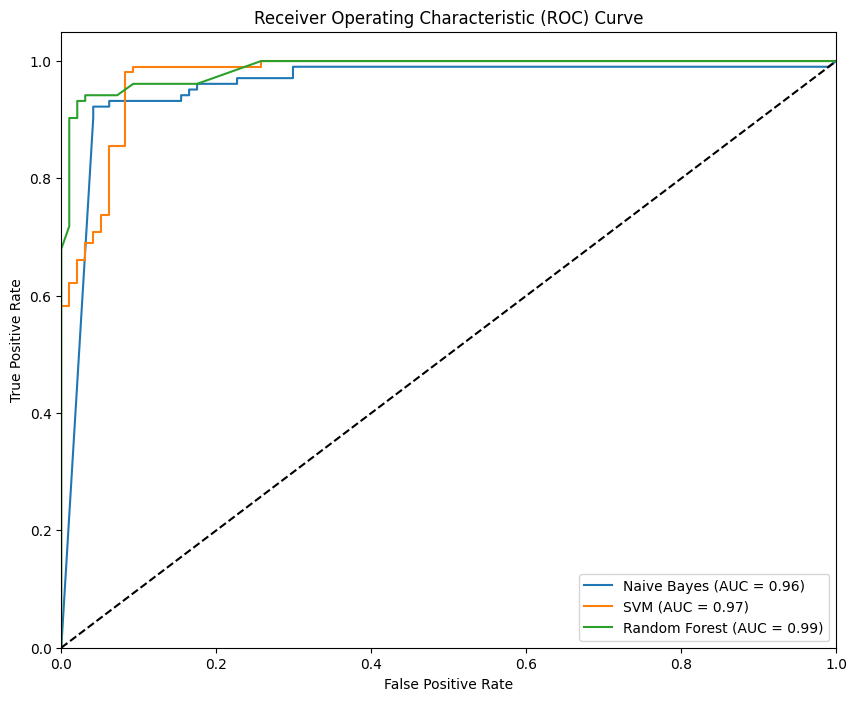

Best model for Fake News Detection using COUNT (Random Forest) saved in Models folder.
Best accuracy: 0.9500

AI Generated Content Detection using TFIDF features
Vector size for tfidf: 1006
Training data shape: (800, 1006)
Testing data shape: (200, 1006)
Naive Bayes Results:
Accuracy: 0.6250
Precision: 0.6246
Recall: 0.6250
F1-score: 0.6244
AUC-ROC: 0.6755


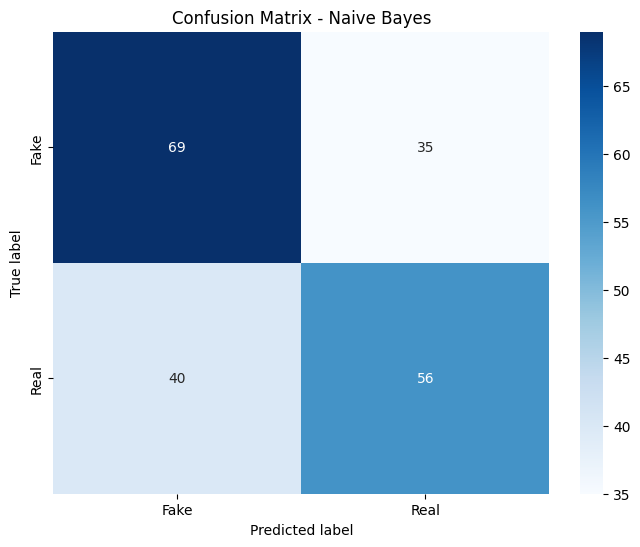

SVM Results:
Accuracy: 0.6650
Precision: 0.6661
Recall: 0.6650
F1-score: 0.6651
AUC-ROC: 0.7272


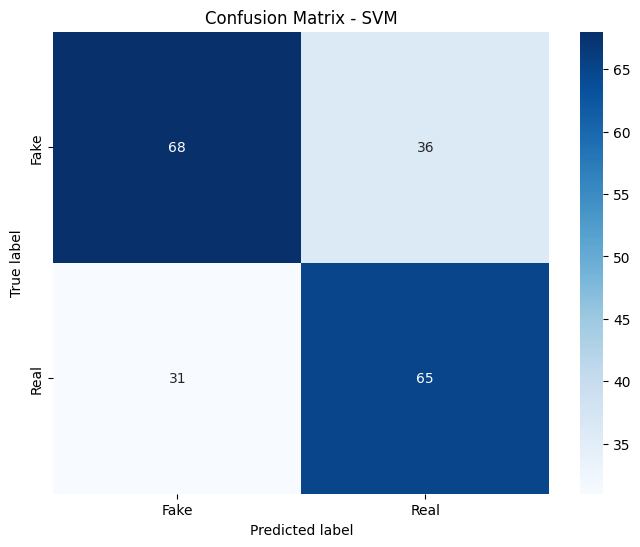

Random Forest Results:
Accuracy: 0.6400
Precision: 0.6400
Recall: 0.6400
F1-score: 0.6400
AUC-ROC: 0.7199


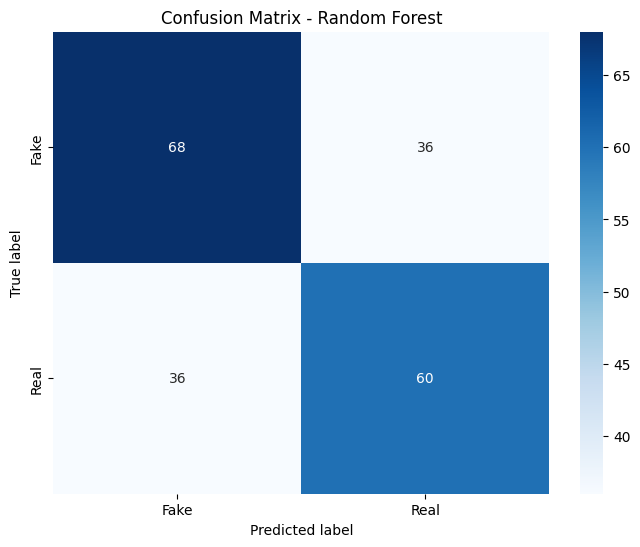

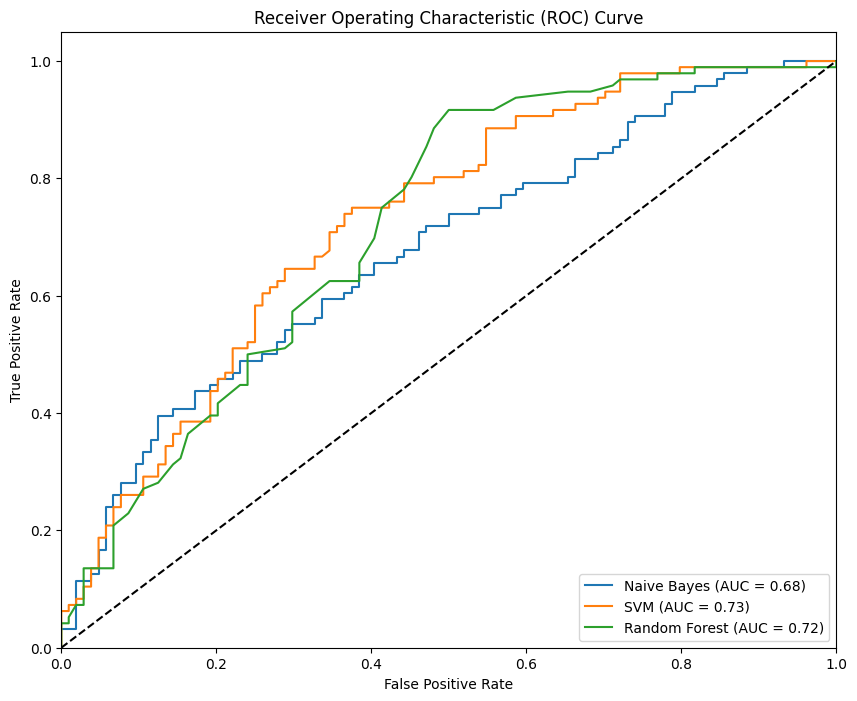

Best model for AI Generated Content Detection using TFIDF (SVM) saved in Models folder.
Best accuracy: 0.6650

AI Generated Content Detection using COUNT features
Vector size for count: 1006
Training data shape: (800, 1006)
Testing data shape: (200, 1006)
Naive Bayes Results:
Accuracy: 0.6550
Precision: 0.6565
Recall: 0.6550
F1-score: 0.6520
AUC-ROC: 0.7403


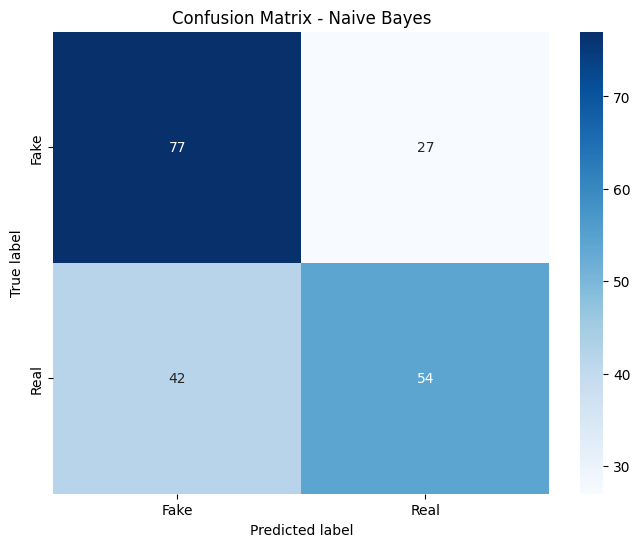

SVM Results:
Accuracy: 0.6050
Precision: 0.6052
Recall: 0.6050
F1-score: 0.6051
AUC-ROC: 0.6610


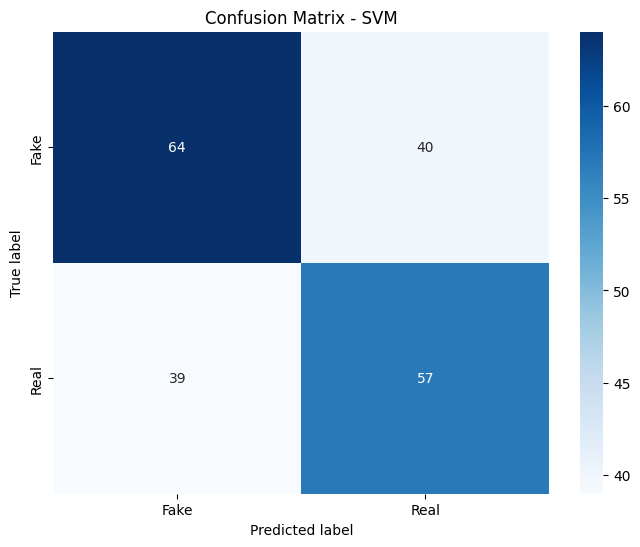

Random Forest Results:
Accuracy: 0.6950
Precision: 0.6948
Recall: 0.6950
F1-score: 0.6947
AUC-ROC: 0.7485


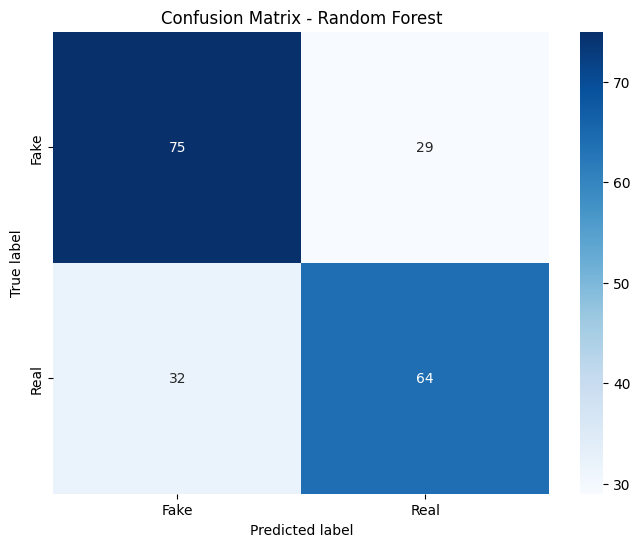

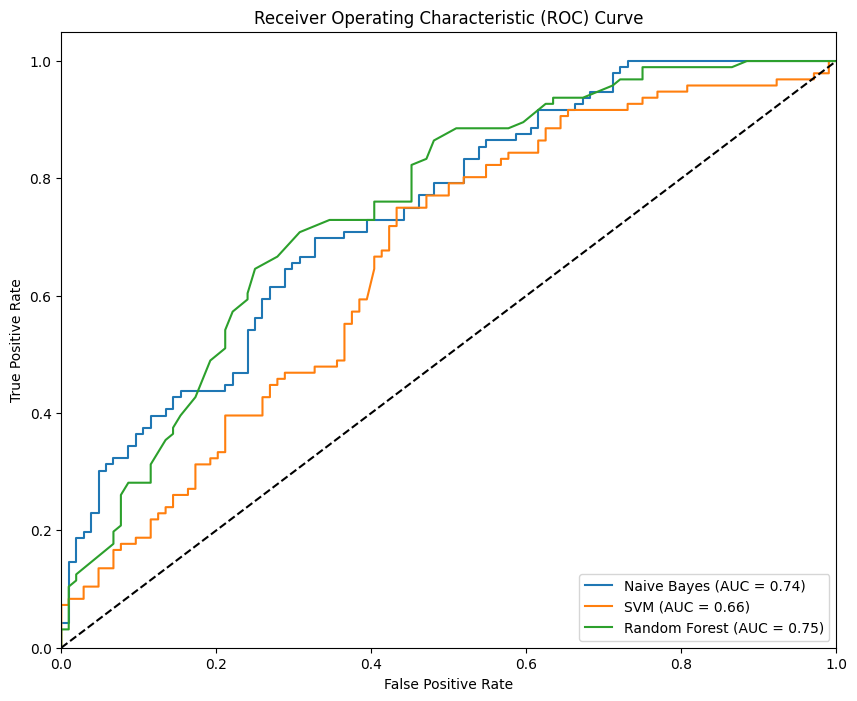

Best model for AI Generated Content Detection using COUNT (Random Forest) saved in Models folder.
Best accuracy: 0.6950

Comparison of TF-IDF and N-gram models for Fake News Detection:
Model		TF-IDF Accuracy	N-gram Accuracy
Naive Bayes		0.9400		0.9350
SVM		0.9350		0.9400
Random Forest		0.9650		0.9500

Comparison of TF-IDF and N-gram models for AI Generated Content Detection:
Model		TF-IDF Accuracy	N-gram Accuracy
Naive Bayes		0.6250		0.6550
SVM		0.6650		0.6050
Random Forest		0.6400		0.6950
Checking for model files in Models folder...
Found: best_model_fake_news_tfidf_Random Forest_0.9650.joblib
Found: best_model_ai_generated_content_tfidf_Random Forest_0.5600.joblib, best_model_ai_generated_content_tfidf_Random Forest_0.6400.joblib, best_model_ai_generated_content_tfidf_SVM_0.6650.joblib
Found: tfidf_vectorizer_fake_news.joblib
Found: tfidf_vectorizer_ai_generated_content.joblib
Saved .joblib files in Models folder:
best_model_ai_generated_content_count_Random Forest_0.5750.joblib
best

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
import joblib
from collections import Counter
import math
import os
import glob

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def ensure_models_folder():
    models_folder = os.path.join(os.getcwd(), 'Models')
    if not os.path.exists(models_folder):
        os.makedirs(models_folder)
    return models_folder

def load_data(fake_path, true_path):
    data_fake = pd.read_csv(fake_path)
    data_true = pd.read_csv(true_path)
    data_fake["class"] = 0
    data_true["class"] = 1
    return pd.concat([data_fake, data_true], axis=0, ignore_index=True)

def load_ai_data(human_path, gpt_path):
    human_data = pd.read_csv(human_path)
    gpt_data = pd.read_csv(gpt_path)
    ai_data = pd.concat([gpt_data, human_data], ignore_index=True)
    return ai_data.sample(frac=1)

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    number_of_sentences = len(sentences)
    total_words = sum(len(sentence.split()) for sentence in sentences)
    avg_sentence = total_words / number_of_sentences if number_of_sentences > 0 else 0
    return number_of_sentences, avg_sentence

def repetitive_words(text):
    tokens = nltk.word_tokenize(text.lower())
    synsets = [wn.synsets(token) for token in tokens]
    synonyms = [[lemma.name() for synset in token_synsets for lemma in synset.lemmas()] for token_synsets in synsets]
    repeat = sum(len(set(s1) & set(s2)) > 0 for i, s1 in enumerate(synonyms) for s2 in synonyms[i+1:])
    return repeat / len(tokens) if tokens else 0

def entropy(text):
    tokens = nltk.word_tokenize(text.lower())
    token_counts = Counter(tokens)
    total = len(tokens)
    probs = [count / total for count in token_counts.values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)

def count_punctuation(text):
    sentences = nltk.sent_tokenize(text)
    number_of_sentences = len(sentences)
    count = sum(1 for char in text if char in string.punctuation)
    return count / number_of_sentences if number_of_sentences > 0 else 0

def count_numbers(text):
    sentences = nltk.sent_tokenize(text)
    number_of_sentences = len(sentences)
    count = sum(1 for word in text.split() if any(c.isdigit() for c in word))
    return count / number_of_sentences if number_of_sentences > 0 else 0

def extract_features(texts, feature_type='tfidf', ngram_range=(1, 3)):
    if feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    elif feature_type == 'count':
        vectorizer = CountVectorizer(ngram_range=ngram_range)
    else:
        raise ValueError("Invalid feature type. Use 'tfidf' or 'count'.")
    return vectorizer.fit_transform(texts), vectorizer

def extract_ai_features(df, feature_type='tfidf', vectorizer=None):
    if vectorizer is None:
        if feature_type == 'tfidf':
            vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)
        elif feature_type == 'count':
            vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=1000)
        else:
            raise ValueError("Invalid feature type. Use 'tfidf' or 'count'.")
        text_features = vectorizer.fit_transform(df['text'])
    else:
        text_features = vectorizer.transform(df['text'])
    
    df['Sentence_length'], df['Average_sentence_length'] = zip(*df['text'].apply(sentence_length))
    df['Repetitive_words'] = df['text'].apply(repetitive_words)
    df['Entropy'] = df['text'].apply(entropy)
    df['Punctuation_count'] = df['text'].apply(count_punctuation)
    df['Numbers_count'] = df['text'].apply(count_numbers)
    
    additional_features = df[['Sentence_length', 'Average_sentence_length', 'Repetitive_words', 'Entropy', 'Punctuation_count', 'Numbers_count']]
    combined_features = np.hstack((text_features.toarray(), additional_features))
    
    return combined_features, vectorizer

def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['Fake', 'Real'], title=f'Confusion Matrix - {model_name}')
    
    return model, {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc_roc': auc_roc
    }

def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def process_data(data, task, feature_type):
    print(f"\n{task} Detection using {feature_type.upper()} features")
    
    X = data['text']
    y = data['class'] if task == 'Fake News' else data['generated']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if task == 'AI Generated Content':
        X_train_vec, vectorizer = extract_ai_features(data.loc[X_train.index], feature_type)
        X_test_vec, _ = extract_ai_features(data.loc[X_test.index], feature_type, vectorizer)
    else:
        X_train_vec, vectorizer = extract_features(X_train, feature_type)
        X_test_vec = vectorizer.transform(X_test)

    print(f"Vector size for {feature_type}: {X_train_vec.shape[1]}")
    print(f"Training data shape: {X_train_vec.shape}")
    print(f"Testing data shape: {X_test_vec.shape}")

    models = {
        'Naive Bayes': MultinomialNB(),
        'SVM': SVC(kernel='linear', probability=True),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    }
    
    results = {}
    for name, model in models.items():
        trained_model, metrics = train_and_evaluate_model(model, X_train_vec, y_train, X_test_vec, y_test, name)
        results[name] = {'model': trained_model, 'metrics': metrics}
    
    plot_roc_curve({name: result['model'] for name, result in results.items()}, X_test_vec, y_test)
    
    best_model_name = max(results, key=lambda k: results[k]['metrics']['accuracy'])
    best_accuracy = results[best_model_name]['metrics']['accuracy']
    
    models_folder = ensure_models_folder()
    
    joblib.dump(results[best_model_name]['model'], 
                os.path.join(models_folder, f'best_model_{task.lower().replace(" ", "_")}_{feature_type}_{best_model_name}_{best_accuracy:.4f}.joblib'))
    joblib.dump(vectorizer, 
                os.path.join(models_folder, f'{feature_type}_vectorizer_{task.lower().replace(" ", "_")}.joblib'))
    
    print(f"Best model for {task} Detection using {feature_type.upper()} ({best_model_name}) saved in Models folder.")
    print(f"Best accuracy: {best_accuracy:.4f}")
    
    return results

def load_best_models():
    try:
        models_folder = os.path.join(os.getcwd(), 'Models')
        
        fake_news_models = glob.glob(os.path.join(models_folder, 'best_model_fake_news_*.joblib'))
        ai_content_models = glob.glob(os.path.join(models_folder, 'best_model_ai_generated_content_*.joblib'))
        
        def get_accuracy(filename):
            return float(filename.split('_')[-1].replace('.joblib', ''))
        
        best_fake_news_model = max(fake_news_models, key=get_accuracy)
        best_ai_content_model = max(ai_content_models, key=get_accuracy)
        
        fake_news_model = joblib.load(best_fake_news_model)
        ai_content_model = joblib.load(best_ai_content_model)
        
        fake_news_vectorizer = joblib.load(os.path.join(models_folder, 'tfidf_vectorizer_fake_news.joblib'))
        ai_content_vectorizer = joblib.load(os.path.join(models_folder, 'tfidf_vectorizer_ai_generated_content.joblib'))
        
        print(f"Loaded best Fake News model: {os.path.basename(best_fake_news_model)}")
        print(f"Loaded best AI Generated Content model: {os.path.basename(best_ai_content_model)}")
        
    except FileNotFoundError as e:
        print(f"Error loading models: {e}")
        print("Saved models not found in the Models folder. Please run the training process first.")
        return None, None, None, None
    
    return fake_news_model, ai_content_model, fake_news_vectorizer, ai_content_vectorizer

def list_joblib_files():
    models_folder = os.path.join(os.getcwd(), 'Models')
    joblib_files = [f for f in os.listdir(models_folder) if f.endswith('.joblib')]
    print("Saved .joblib files in Models folder:")
    for file in joblib_files:
        print(file)

def check_and_print_model_files():
    print("Checking for model files in Models folder...")
    models_folder = os.path.join(os.getcwd(), 'Models')
    expected_files = [
        'best_model_fake_news_tfidf_*.joblib',
        'best_model_ai_generated_content_tfidf_*.joblib',
        'tfidf_vectorizer_fake_news.joblib',
        'tfidf_vectorizer_ai_generated_content.joblib'
    ]
    for file_pattern in expected_files:
        matching_files = glob.glob(os.path.join(models_folder, file_pattern))
        if matching_files:
            print(f"Found: {', '.join(os.path.basename(f) for f in matching_files)}")
        else:
            print(f"Missing: {file_pattern}")

def predict_text(text, model, vectorizer, task):
    if model is None or vectorizer is None:
        return None, None
    processed_text = wordopt(text)
    if task == 'AI Generated Content':
        df = pd.DataFrame({'text': [processed_text]})
        vectorized_text, _ = extract_ai_features(df, vectorizer=vectorizer)
    else:
        vectorized_text = vectorizer.transform([processed_text])
    prediction = model.predict(vectorized_text)[0]
    probability = model.predict_proba(vectorized_text)[0][1]
    return prediction, probability

def test_user_input():
    fake_news_model, ai_content_model, fake_news_vectorizer, ai_content_vectorizer = load_best_models()
    
    if fake_news_model is None:
        print("Unable to load models. Please train the models first.")
        return
    
    while True:
        user_input = input("Enter a text to analyze (or 'quit' to exit): ")
        if user_input.lower() == 'quit':
            break
        
        fake_news_pred, fake_news_prob = predict_text(user_input, fake_news_model, fake_news_vectorizer, 'Fake News')
        ai_content_pred, ai_content_prob = predict_text(user_input, ai_content_model, ai_content_vectorizer, 'AI Generated Content')
        
        if fake_news_pred is not None:
            print(f"Fake News Detection: {'Fake' if fake_news_pred == 0 else 'Real'} (Confidence: {fake_news_prob:.2%})")
        if ai_content_pred is not None:
            print(f"AI-Generated Content: {'AI-generated' if ai_content_pred == 1 else 'Human-written'} (Confidence: {ai_content_prob:.2%})")
        print()

def main():
    # Fake News Detection
    data_fake_news = load_data('DataSets/Fake.csv', 'DataSets/True.csv')
    data_fake_news['text'] = data_fake_news['text'].apply(wordopt)
    data_fake_news = data_fake_news.sample(n=1000, random_state=42)  # Adjust sample size as needed
    
    tfidf_results_fake = process_data(data_fake_news, 'Fake News', 'tfidf')
    ngram_results_fake = process_data(data_fake_news, 'Fake News', 'count')

    # AI Generated Content Detection
    data_ai = load_ai_data('DataSets/human.csv', 'DataSets/GPT.csv')
    data_ai['text'] = data_ai['text'].apply(wordopt)
    data_ai = data_ai.sample(n=1000, random_state=42)  # Sample before feature extraction
    
    tfidf_results_ai = process_data(data_ai, 'AI Generated Content', 'tfidf')
    ngram_results_ai = process_data(data_ai, 'AI Generated Content', 'count')

    # Compare TF-IDF and N-gram results
    for task, tfidf_res, ngram_res in [('Fake News', tfidf_results_fake, ngram_results_fake),
                                       ('AI Generated Content', tfidf_results_ai, ngram_results_ai)]:
        print(f"\nComparison of TF-IDF and N-gram models for {task} Detection:")
        print("Model\t\tTF-IDF Accuracy\tN-gram Accuracy")
        for model in tfidf_res.keys():
            tfidf_acc = tfidf_res[model]['metrics']['accuracy']
            ngram_acc = ngram_res[model]['metrics']['accuracy']
            print(f"{model}\t\t{tfidf_acc:.4f}\t\t{ngram_acc:.4f}")
    
    # Check saved model files
    check_and_print_model_files()
    list_joblib_files()

if __name__ == "__main__":
    main()
    test_user_input()